In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
data = pd.read_csv('dataset/train.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

Delete the row Loan_ID as it of no use

In [5]:
data.drop('Loan_ID', axis=1, inplace=True)

In [6]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In order to get a basic idea of our dataset we will check the percentage of the result possibility 

Percentage of Yes class : 0.69
Percentage of No class : 0.31


C:\Users\Sivajeet Chand\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


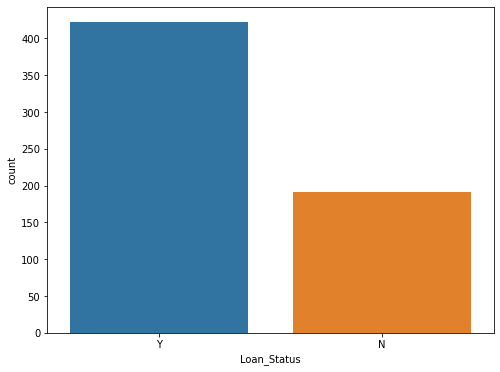

In [7]:
plt.figure(figsize=(8,6))
sb.countplot(data['Loan_Status']);

print('Percentage of Yes class : %.2f' % (data['Loan_Status'].value_counts()[0] / len(data)))
print('Percentage of No class : %.2f' % (data['Loan_Status'].value_counts()[1] / len(data)))

In order to decide which properties are having high impact on the value of Loan_Status, we will try to plot the properties with relation to Loan_Status. ( How important is a specific feature to the Loan_Status?)

C:\Users\Sivajeet Chand\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Sivajeet Chand\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


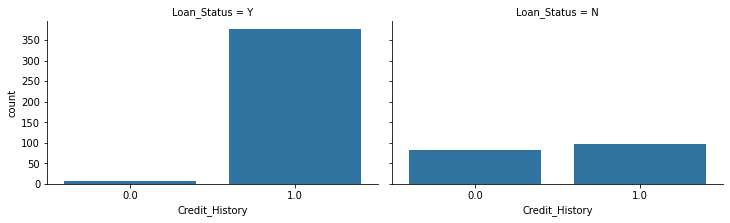

In [8]:
# Credit_History vs Loan_Status

grid_1 = sb.FacetGrid(data,col='Loan_Status', size=3.2, aspect=1.6)
grid_1.map(sb.countplot, 'Credit_History');

# From the graph we can see that, we didn't give a loan for most people who got Credit_History of 0
# but we give a loan for most of people who got Credit_History of 1
# so we can say if you got Credit_History = 1 , you will have better chance to get a loan

#Credit_history is an important feature

C:\Users\Sivajeet Chand\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Sivajeet Chand\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


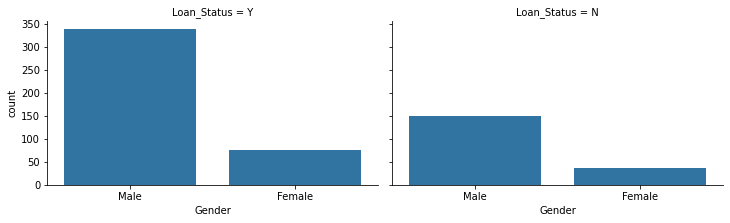

In [9]:
# Gender vs Loan_Status

grid_2 = sb.FacetGrid(data,col='Loan_Status', size=3.2, aspect=1.6)
grid_2.map(sb.countplot, 'Gender');

# most males got loan and most females got one too so there is actually no pattern, similarly some males didn't get and females too.

# not so important feature

In [11]:
#Handling Missing values

null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']
for col in null_cols:
    data[col] = data[col].fillna(
    data[col].dropna().mode().values[0] ) 
data.isnull().sum().sort_values(ascending=False)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
# Converting Categorical values to numeric

numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

# adding the new numeric values from the to_numeric variable to both datasets
data = data.applymap(lambda lable: numeric.get(lable) if lable in numeric else lable)


# convertind the Dependents column
Dependents_ = pd.to_numeric(data.Dependents)


# dropping the previous Dependents column
data.drop(['Dependents'], axis = 1, inplace = True)


Correlation Matrix

In [17]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<AxesSubplot:>

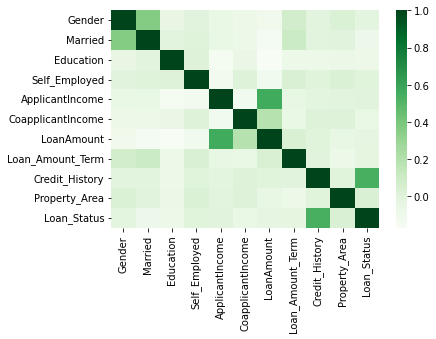

In [20]:
sb.heatmap(data.corr() ,cmap='Greens')

In [21]:
corr = data.corr()
corr.style.background_gradient(cmap='Greens').set_precision(2)

C:\Users\Sivajeet Chand\AppData\Local\Temp\ipykernel_25468\405601103.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='Greens').set_precision(2)


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.00,0.36,-0.05,-0.00,-0.06,-0.08,-0.11,0.07,-0.01,0.03,-0.02
Married,0.36,1.00,-0.01,0.00,-0.05,-0.08,-0.15,0.10,-0.01,-0.00,-0.09
Education,-0.05,-0.01,1.00,0.01,-0.14,-0.06,-0.17,-0.07,-0.07,-0.07,-0.09
Self_Employed,-0.00,0.00,0.01,1.00,-0.13,0.02,-0.11,0.03,0.00,0.03,0.00
ApplicantIncome,-0.06,-0.05,-0.14,-0.13,1.00,-0.12,0.56,-0.05,-0.02,-0.01,-0.00
CoapplicantIncome,-0.08,-0.08,-0.06,0.02,-0.12,1.00,0.19,-0.06,0.01,0.01,-0.06
LoanAmount,-0.11,-0.15,-0.17,-0.11,0.56,0.19,1.00,0.04,-0.00,-0.05,-0.03
Loan_Amount_Term,0.07,0.10,-0.07,0.03,-0.05,-0.06,0.04,1.00,-0.00,-0.08,-0.02
Credit_History,-0.01,-0.01,-0.07,0.00,-0.02,0.01,-0.00,-0.00,1.00,0.00,0.54
Property_Area,0.03,-0.00,-0.07,0.03,-0.01,0.01,-0.05,-0.08,0.00,1.00,0.03


On basis of the Graphs and Visualization we have selected only few matrix to train our model
We decided to with Credit_History, CoapplicantIncome , Education, Married, Property_Area as our features for the models.

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Train test split

In [28]:
y = data['Loan_Status']
X = data[['Credit_History','CoapplicantIncome','Education','Married','Property_Area']]
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [29]:
# Decision Tree

DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)

y_predict = DecisionTree.predict(X_test)


print(classification_report(y_test, y_predict))

# Accuracy score
score = accuracy_score(y_predict,y_test)
print(f"Accuracy score is {round(score*100,2)}% ")

# Cross Validation Score
cross=cross_val_score(DecisionTree,X,y,cv=5)
print("Cross validation is " ,np.mean(score)*100)

              precision    recall  f1-score   support

           0       0.49      0.53      0.51        51
           1       0.82      0.79      0.80       134

    accuracy                           0.72       185
   macro avg       0.65      0.66      0.66       185
weighted avg       0.73      0.72      0.72       185

Accuracy score is 71.89% 
Cross validation is , 71.89189189189189


In [31]:
LogisticReg = LogisticRegression()
LogisticReg.fit(x_train, y_train)

y_predict = LogisticReg.predict(X_test)


print(classification_report(y_test, y_predict))

# Accuracy score
score = accuracy_score(y_predict,y_test)
print(f"Accuracy score is {round(score*100,2)}% ")

# Cross Validation Score
cross=cross_val_score(DecisionTree,X,y,cv=5)
print("Cross validation is " ,np.mean(score)*100)

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185

Accuracy score is 83.24% 
Cross validation is  83.24324324324324


In [30]:
#Random Forest Classifier
RandomForest = RandomForestClassifier()
RandomForest.fit(x_train, y_train)

y_predict = RandomForest.predict(X_test)


print(classification_report(y_test, y_predict))

# Accuracy score
score = accuracy_score(y_predict,y_test)
print(f"Accuracy score is {round(score*100,2)}% ")

# Cross Validation Score
cross=cross_val_score(DecisionTree,X,y,cv=5)
print("Cross validation is " ,np.mean(score)*100)

              precision    recall  f1-score   support

           0       0.56      0.55      0.55        51
           1       0.83      0.84      0.83       134

    accuracy                           0.76       185
   macro avg       0.69      0.69      0.69       185
weighted avg       0.76      0.76      0.76       185

Accuracy score is 75.68% 
Cross validation is  75.67567567567568
